In [1]:
import os
from os import listdir
import PIL.Image as pilimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

## - Load data
- Dataset: http://sintel.is.tue.mpg.de/downloads

In [2]:
folder_dir = "./MPI-Sintel-testing/test/clean/wall"
end = (".png", ".jpg")

In [3]:
file_name_list = os.listdir(folder_dir)

## - Sort images in time order

In [4]:
file_name_list.sort()
print(file_name_list)

['frame_0001.png', 'frame_0002.png', 'frame_0003.png', 'frame_0004.png', 'frame_0005.png', 'frame_0006.png', 'frame_0007.png', 'frame_0008.png', 'frame_0009.png', 'frame_0010.png', 'frame_0011.png', 'frame_0012.png', 'frame_0013.png', 'frame_0014.png', 'frame_0015.png', 'frame_0016.png', 'frame_0017.png', 'frame_0018.png', 'frame_0019.png', 'frame_0020.png', 'frame_0021.png', 'frame_0022.png', 'frame_0023.png', 'frame_0024.png', 'frame_0025.png', 'frame_0026.png', 'frame_0027.png', 'frame_0028.png', 'frame_0029.png', 'frame_0030.png', 'frame_0031.png', 'frame_0032.png', 'frame_0033.png', 'frame_0034.png', 'frame_0035.png', 'frame_0036.png', 'frame_0037.png', 'frame_0038.png', 'frame_0039.png', 'frame_0040.png', 'frame_0041.png', 'frame_0042.png', 'frame_0043.png', 'frame_0044.png', 'frame_0045.png', 'frame_0046.png', 'frame_0047.png', 'frame_0048.png', 'frame_0049.png', 'frame_0050.png']


## - Parameters for ShiTomasi corner detection

In [5]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

## - Parameters for lucas kanade optical flow

In [6]:
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

## - Farneback dense optical flow 

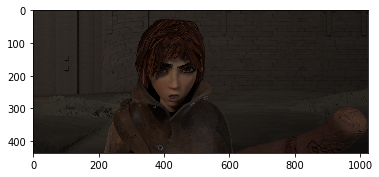

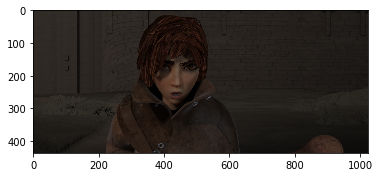

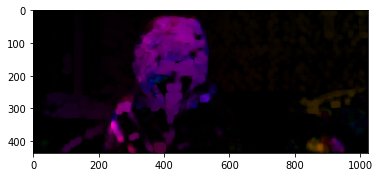

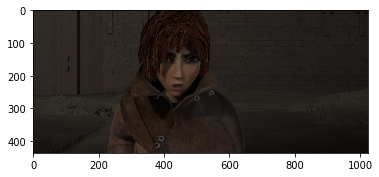

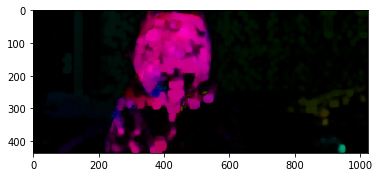

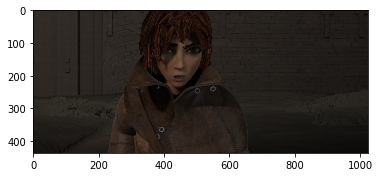

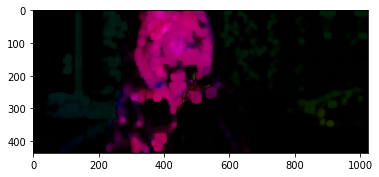

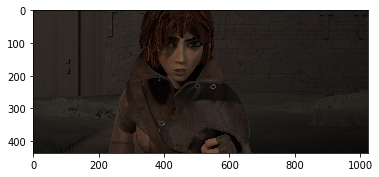

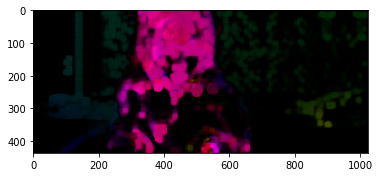

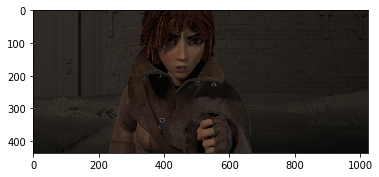

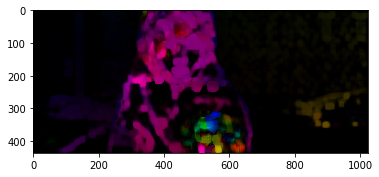

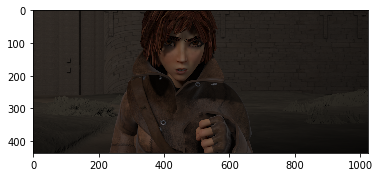

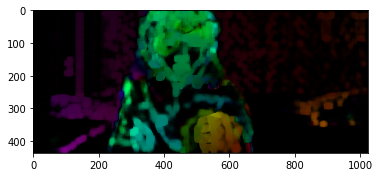

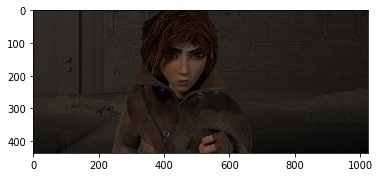

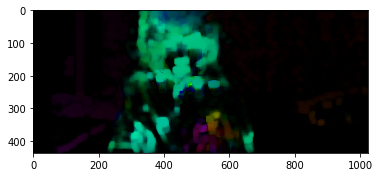

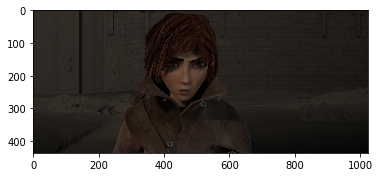

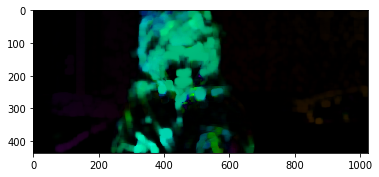

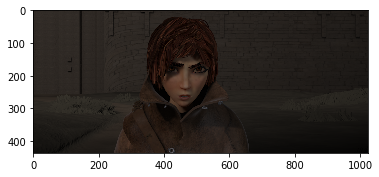

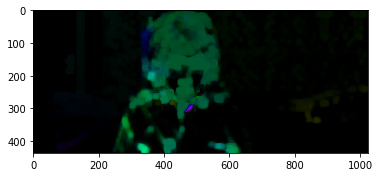

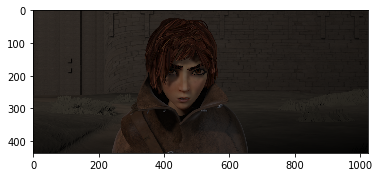

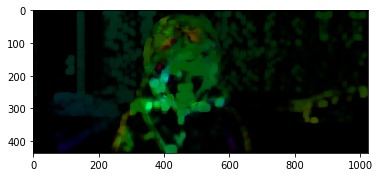

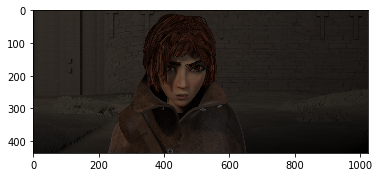

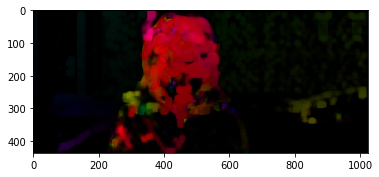

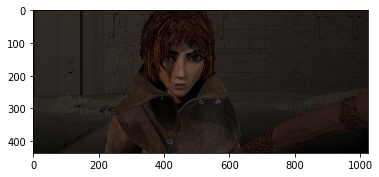

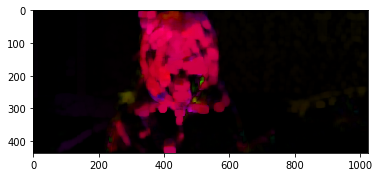

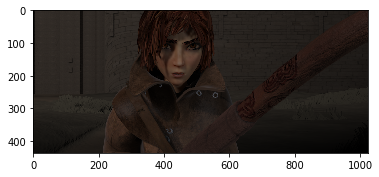

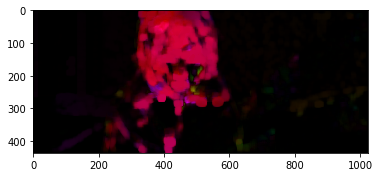

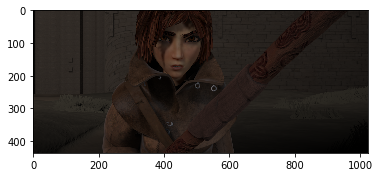

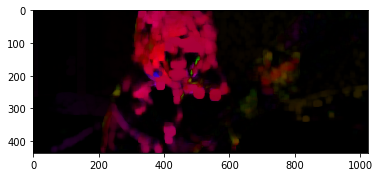

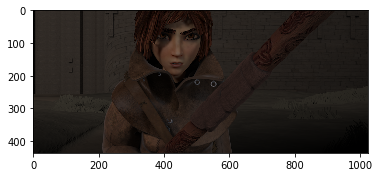

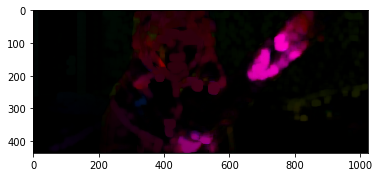

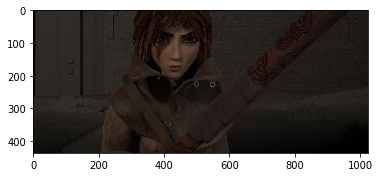

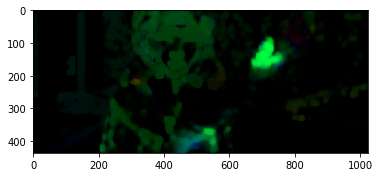

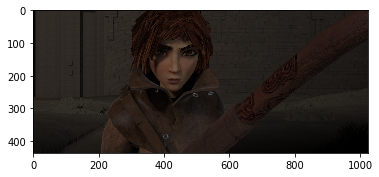

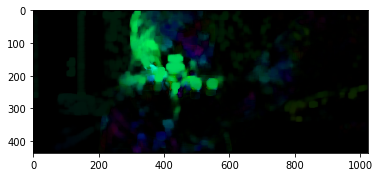

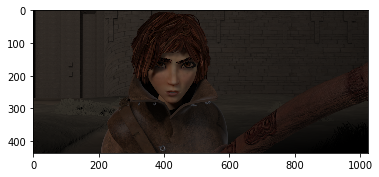

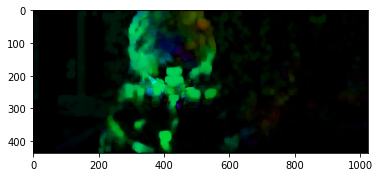

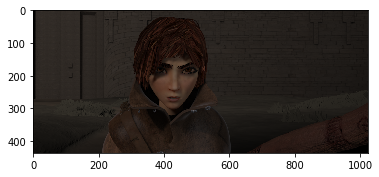

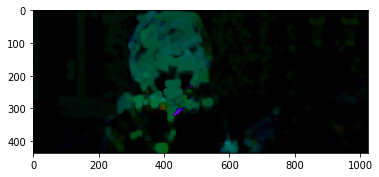

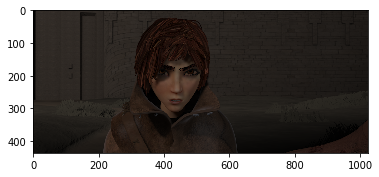

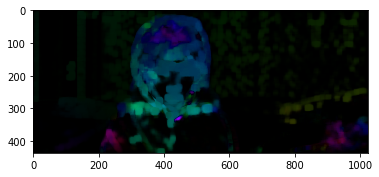

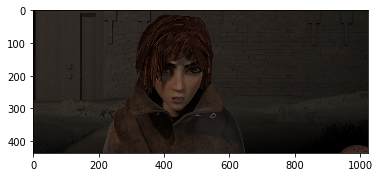

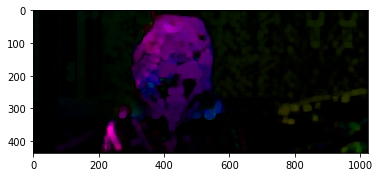

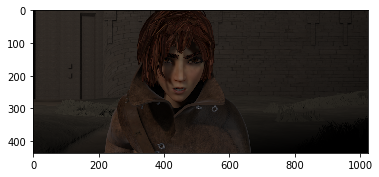

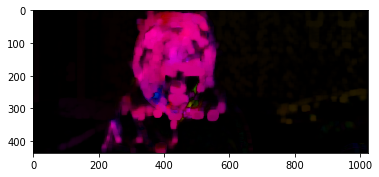

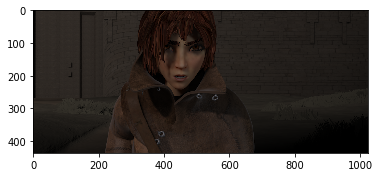

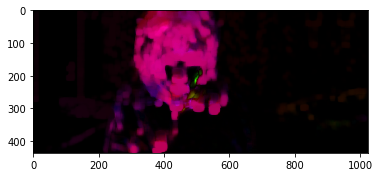

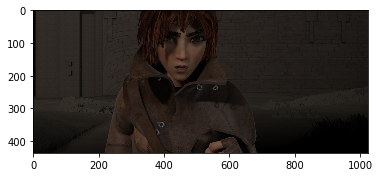

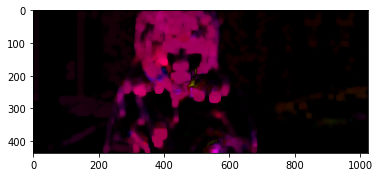

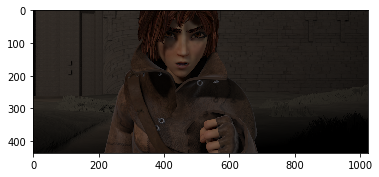

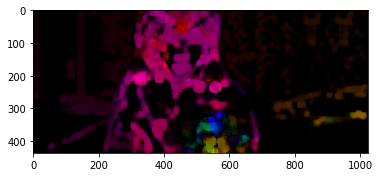

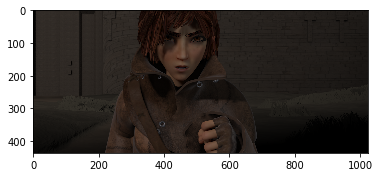

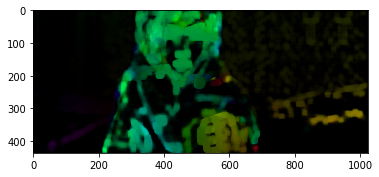

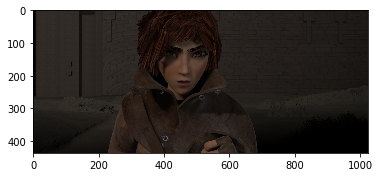

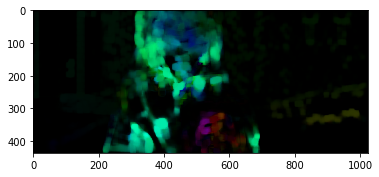

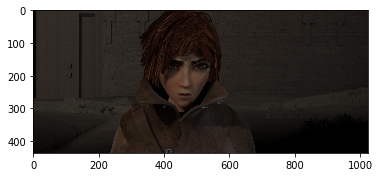

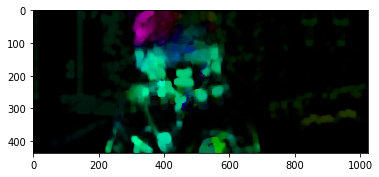

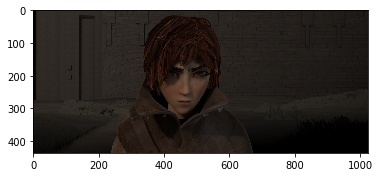

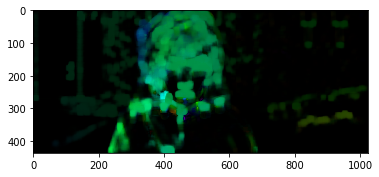

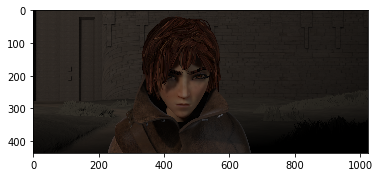

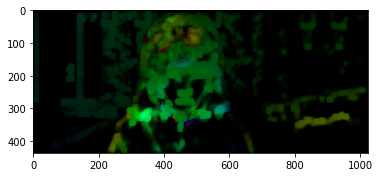

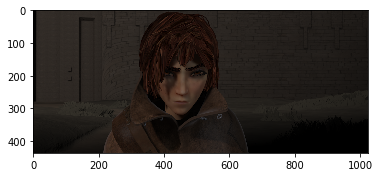

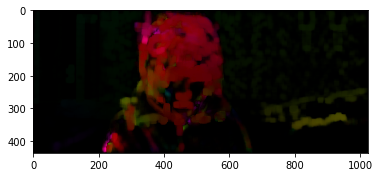

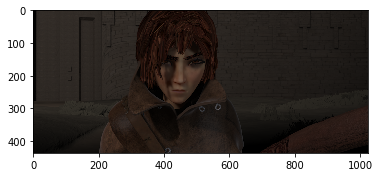

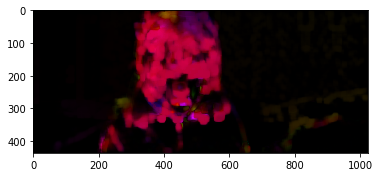

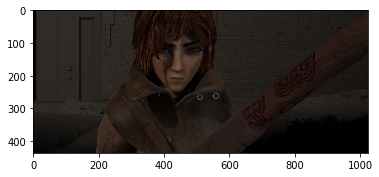

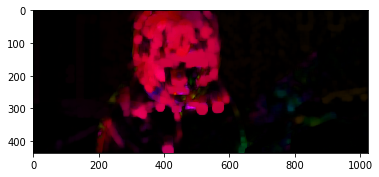

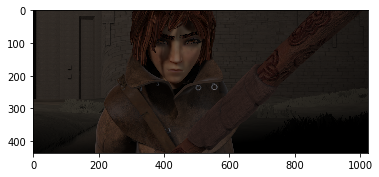

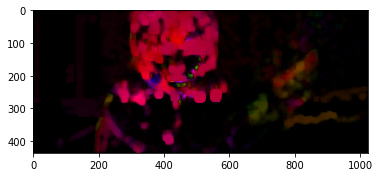

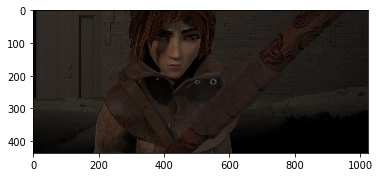

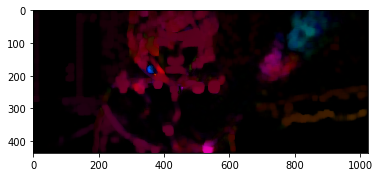

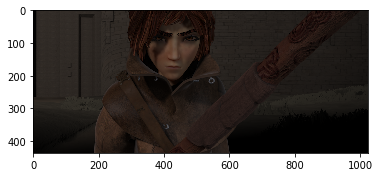

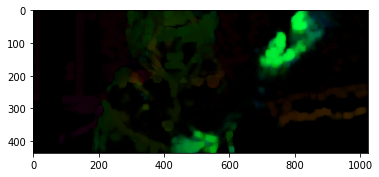

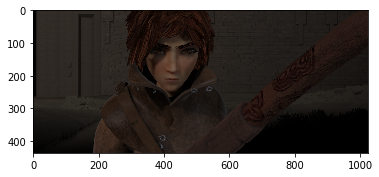

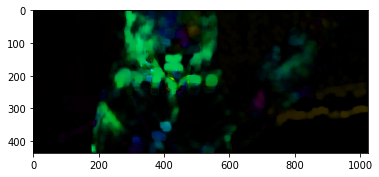

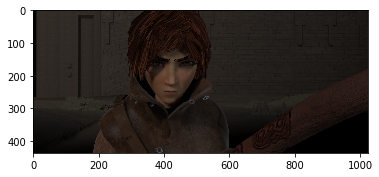

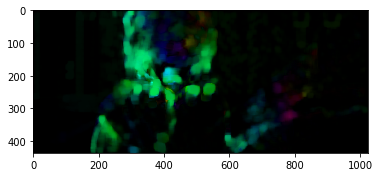

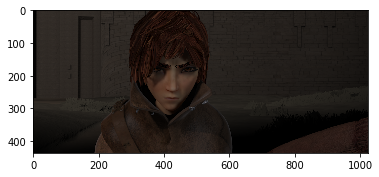

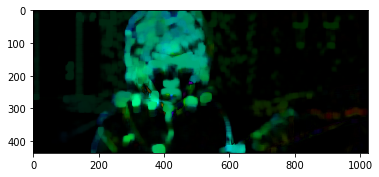

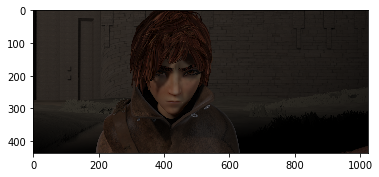

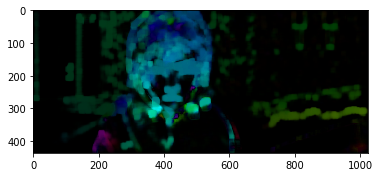

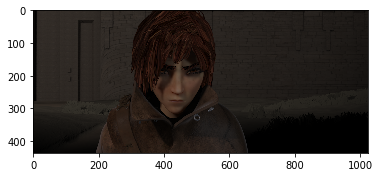

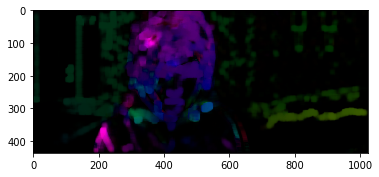

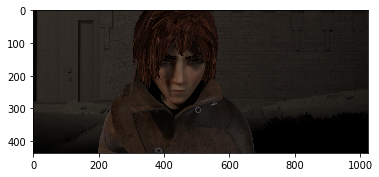

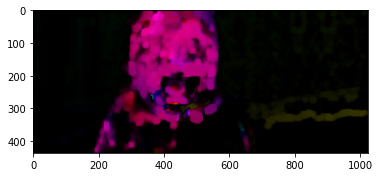

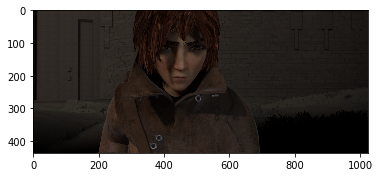

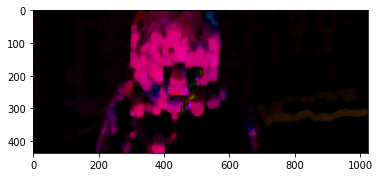

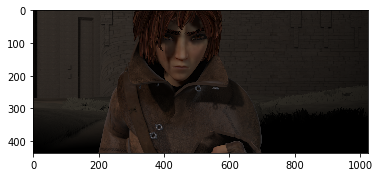

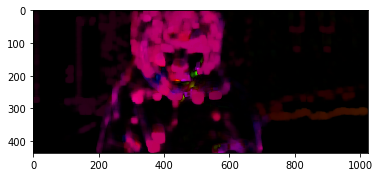

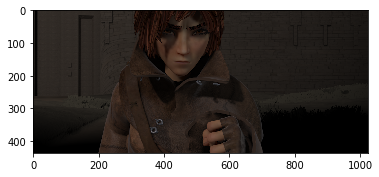

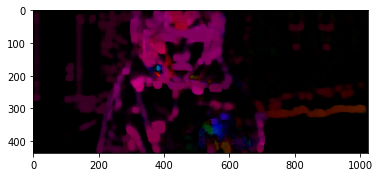

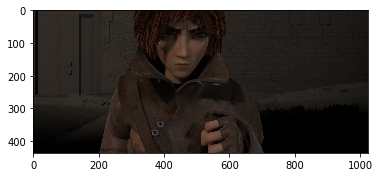

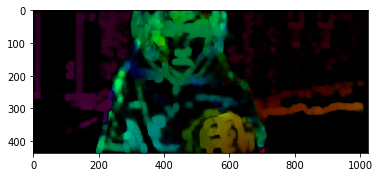

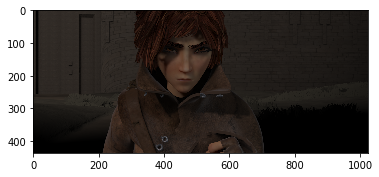

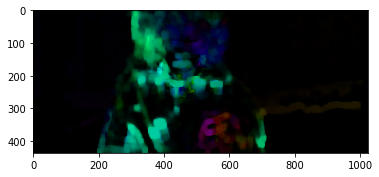

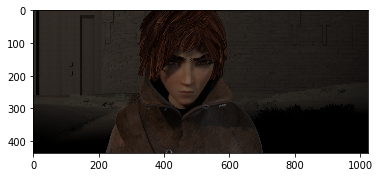

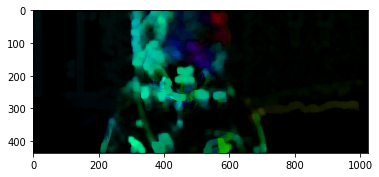

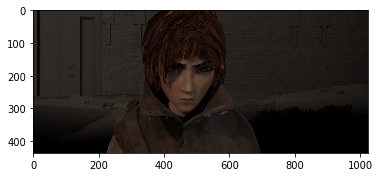

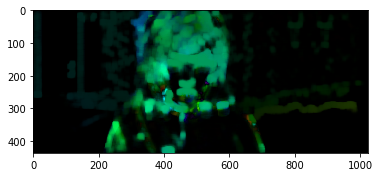

In [7]:
for i, file_name in enumerate(file_name_list):
 
    if (file_name.endswith(end)):
        img_path = os.path.join(folder_dir, file_name)
        
        # Read image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Gray scale
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Show raw image
        plt.imshow(img, interpolation='nearest')
        plt.show()
        
        if i == 0:
           
            mask = np.zeros_like(img)
            mask[..., 1] = 255
        
        elif i > 0:
            
            # Calculate optical flow
            flow = cv2.calcOpticalFlowFarneback(prev_img_gray, img_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            
            # Computes the magnitude and angle of the 2D vectors
            magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
 
            # Sets image hue according to the optical flow direction
            mask[..., 0] = angle * 180 / np.pi / 2
            
            # Sets image value according to the optical flow magnitude (normalized)
            mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
            
            img = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

            # Show result image
            plt.imshow(img, interpolation='nearest')
            plt.show()            

        prev_img_gray = copy.deepcopy(img_gray)